In [1]:
import pickle
import warnings
import platform
from matplotlib import font_manager, rc
import missingno as msno


plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')
    
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
with open('datas/premierleague_players.pkl', 'rb') as f:
    premier_df = pickle.load(f)

In [3]:
premier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name_x          438 non-null    object        
 1   market_value    438 non-null    int64         
 2   app             438 non-null    int64         
 3   conceded_goals  438 non-null    int64         
 4   clean_sheets    438 non-null    int64         
 5   yellow_card     438 non-null    int64         
 6   second_yell     438 non-null    int64         
 7   red_card        438 non-null    int64         
 8   age             438 non-null    int64         
 9   height          438 non-null    int64         
 10  citizenship     438 non-null    int64         
 11  position        438 non-null    object        
 12  foot            438 non-null    object        
 13  agent           438 non-null    object        
 14  club            438 non-null    object        
 15  joined

In [4]:
premier_df.nunique().sort_values()[:7]

citizenship    1
second_yell    2
red_card       2
OwnG           3
foot           3
sns            4
ThrB           4
dtype: int64

- **citizenship, name 컬럼제거 및 second_yell, red_card 컬럼 범주형으로 변경**

In [5]:
print(premier_df['red_card'].value_counts())
print(premier_df['second_yell'].value_counts())
print(premier_df['citizenship'].value_counts())

0    413
1     25
Name: red_card, dtype: int64
0    426
1     12
Name: second_yell, dtype: int64
1    438
Name: citizenship, dtype: int64


In [6]:
premier_df['red_card'] = premier_df['red_card'].astype(str)
premier_df['second_yell'] = premier_df['second_yell'].astype(str)

premier_df['agent'] = premier_df['agent'].apply(lambda x: x.strip())

premier_df.rename(columns={'PS%': "PS"}, inplace=True) # from_formula 방식의 regression 사용을 위해
premier_df.drop(columns=['name_x', 'citizenship'], inplace=True)

- **계약기간 column 생성 및 joined, expire, last_contract 제거**
- period = (expire - last_contract) / 365

In [7]:
premier_df['period'] = premier_df['expire'] - premier_df['last_contract']
premier_df['period'] = np.round(premier_df['period'].apply(lambda x: x.days) / 365, 1)

premier_df.drop(columns=["joined", "expire", "last_contract"], inplace=True)

### conceded_goals, clean_sheets, yellow_card

In [8]:
premier_df.tail(2)

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,agent,club,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM,period
436,2700000,13,2,2,2,0,0,29,191,attack,right,GOAL CLUB,West Bromwich Albion,adidas,1,0.3,0.1,1.0,0.0,1.0,0.2,0.1,0.0,2.0,0.6,15.8,63.6,0.2,0.6,0.0,6.76,2.0,1.7,0.8,1.6,1.2,1.2,1.6,3.6,1.0,1.8
437,1620000,15,0,0,1,0,0,31,183,attack,left,no agent,West Bromwich Albion,adidas,2,0.1,0.1,0.7,0.0,0.3,0.1,0.0,0.0,0.0,0.1,2.7,70.0,0.0,0.1,0.0,5.98,0.0,0.3,0.3,0.5,0.1,0.9,1.3,0.1,0.0,4.0


In [9]:
premier_df["conceded_goals"] = (premier_df["conceded_goals"] / premier_df["app"]).round(1)
premier_df["clean_sheets"] = (premier_df["clean_sheets"] / premier_df["app"]).round(1)
premier_df["yellow_card"] = (premier_df["yellow_card"] / premier_df["app"]).round(1)

In [10]:
premier_df.tail(2)

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,agent,club,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM,period
436,2700000,13,0.2,0.2,0.2,0,0,29,191,attack,right,GOAL CLUB,West Bromwich Albion,adidas,1,0.3,0.1,1.0,0.0,1.0,0.2,0.1,0.0,2.0,0.6,15.8,63.6,0.2,0.6,0.0,6.76,2.0,1.7,0.8,1.6,1.2,1.2,1.6,3.6,1.0,1.8
437,1620000,15,0.0,0.0,0.1,0,0,31,183,attack,left,no agent,West Bromwich Albion,adidas,2,0.1,0.1,0.7,0.0,0.3,0.1,0.0,0.0,0.0,0.1,2.7,70.0,0.0,0.1,0.0,5.98,0.0,0.3,0.3,0.5,0.1,0.9,1.3,0.1,0.0,4.0


### agent column
- 방법 1. agent가 있으면 1, 없으면 0

In [11]:
premier_df['agent'] = premier_df['agent'].apply(lambda x: "0" if x == "no agent" else "1")

### columns visualization

In [14]:
cols = premier_df['position'].unique()

def make_by_position(target_col, kde=True):
    
    plt.figure(figsize=(20, 10))
    
    plt.subplot(321)
    sns.distplot(premier_df[target_col], kde=kde)
    plt.title('all players', fontsize=20)
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))
    
    plt.subplot(322)
    plt.axis([0, 50, 0, 50])
    plt.text(25, 25, f"position별 {target_col} 분포", fontsize=24, bbox=dict(boxstyle='square', color="white"), ha='center')
    
    plt.subplot(323)
    sns.distplot(premier_df[target_col][premier_df['position'] == cols[0]], kde=kde, color='r')
    plt.title(cols[0], fontsize=20)
#     plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col][premier_df['position'] == cols[0]]))
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))
    
    plt.subplot(324)
    sns.distplot(premier_df[target_col][premier_df['position'] == cols[1]], kde=kde, color='g')
    plt.title(cols[1], fontsize=20)
#     plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col][premier_df['position'] == cols[1]]))
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))
    
    plt.subplot(325)
    sns.distplot(premier_df[target_col][premier_df['position'] == cols[2]], kde=kde, color='b')
    plt.title(cols[2], fontsize=20)
#     plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col][premier_df['position'] == cols[2]]))
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))
    
    plt.subplot(326)
    sns.distplot(premier_df[target_col][premier_df['position'] == cols[3]], kde=kde, color='purple')
    plt.title(cols[3], fontsize=20)
#     plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col][premier_df['position'] == cols[3]]))
    plt.xlim(np.min(premier_df[target_col]), np.max(premier_df[target_col]))

    plt.tight_layout()
    plt.show()

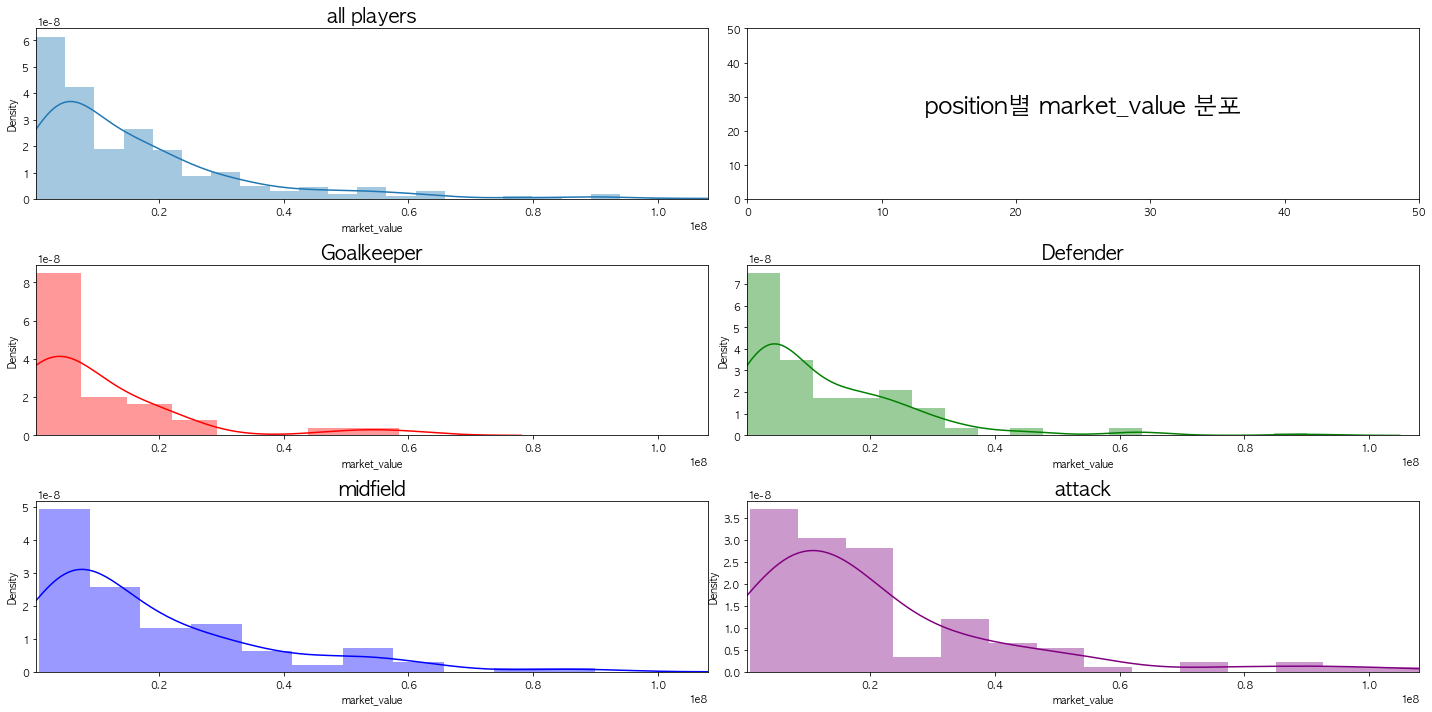

In [90]:
make_by_position('market_value', kde=True)

4500000.0 22500000.0


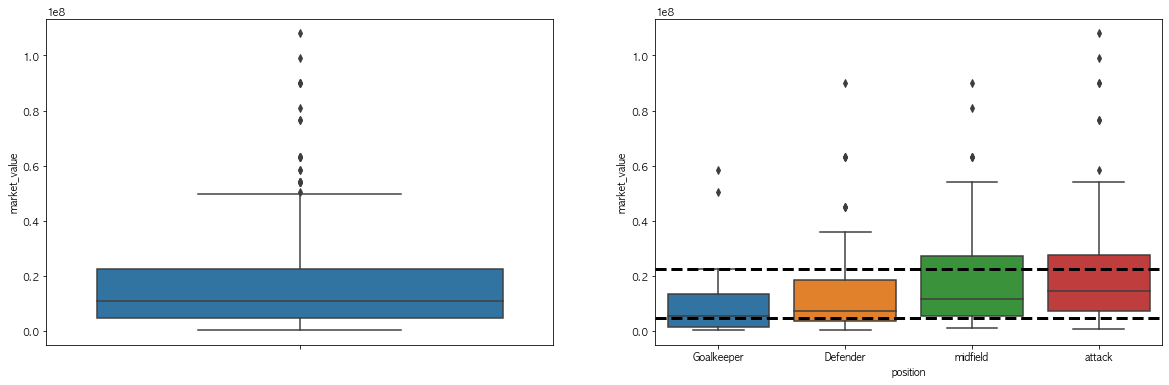

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.boxplot(data=premier_df, y='market_value', ax=ax[0])
sns.boxplot(data=premier_df, x='position', y='market_value', ax=ax[1])
plt.axhline(np.percentile(premier_df['market_value'], 25), color='black', linestyle='--', linewidth=3)
plt.axhline(np.percentile(premier_df['market_value'], 75), color='black', linestyle='--', linewidth=3)
print(np.percentile(premier_df['market_value'], 25),
     np.percentile(premier_df['market_value'], 75))

plt.show()

-> midfield, attack의 market_value가 goalkeeper, defender보다 높게 책정되어 있는 것을 확인할 수 있다.

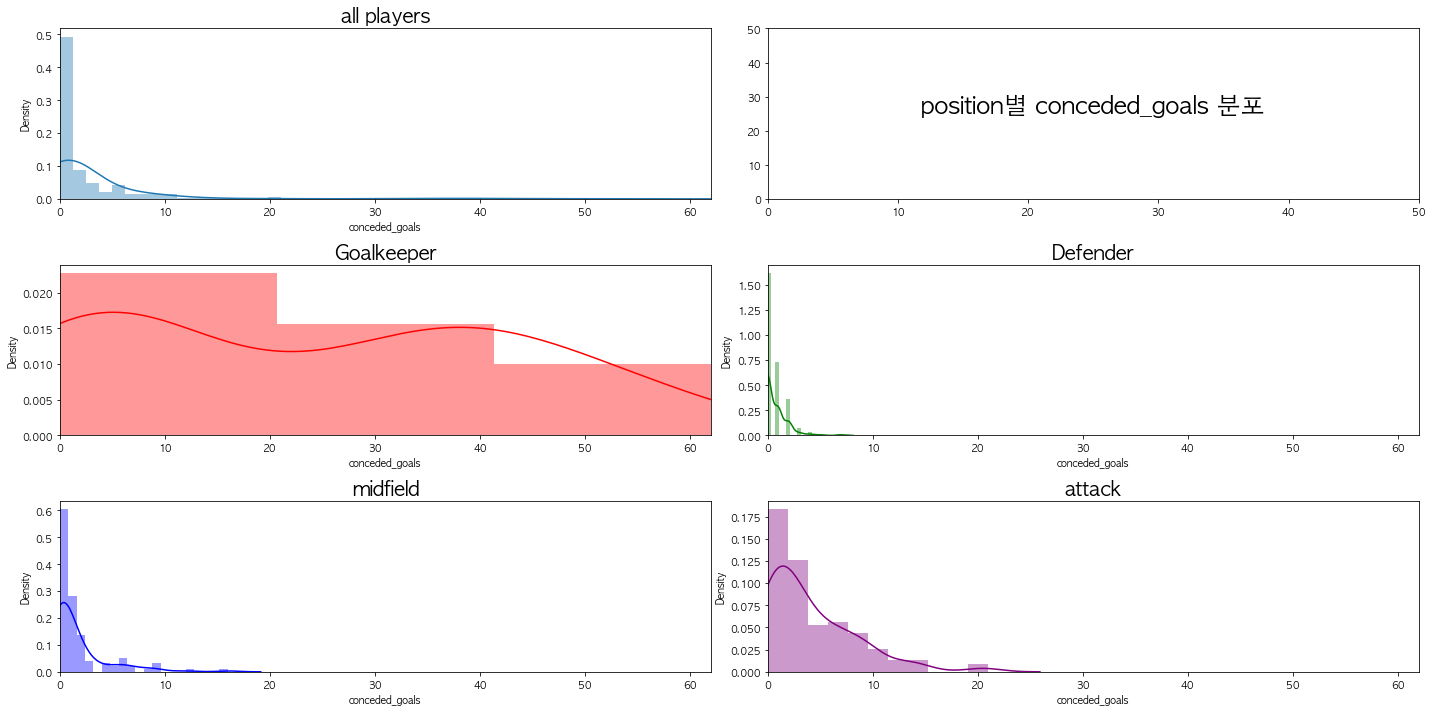

In [91]:
make_by_position('conceded_goals')

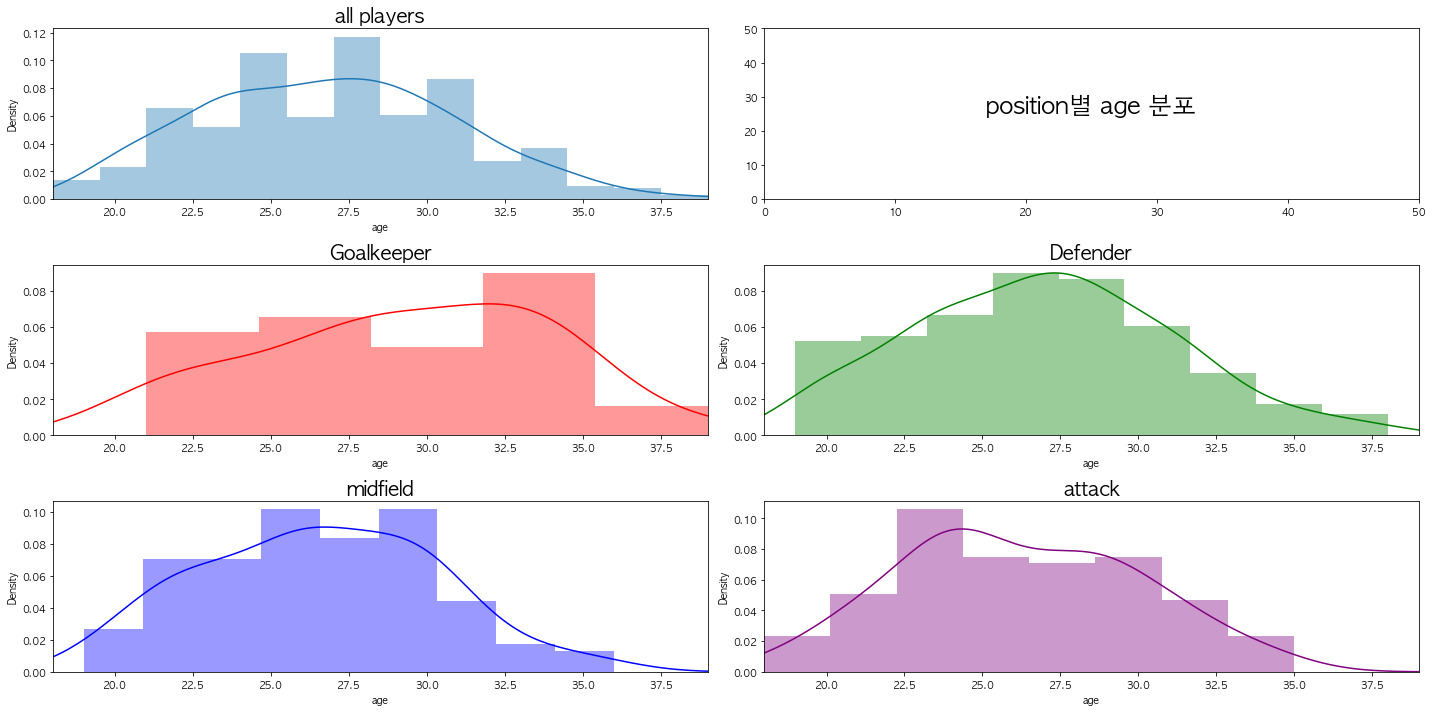

In [92]:
make_by_position('age')

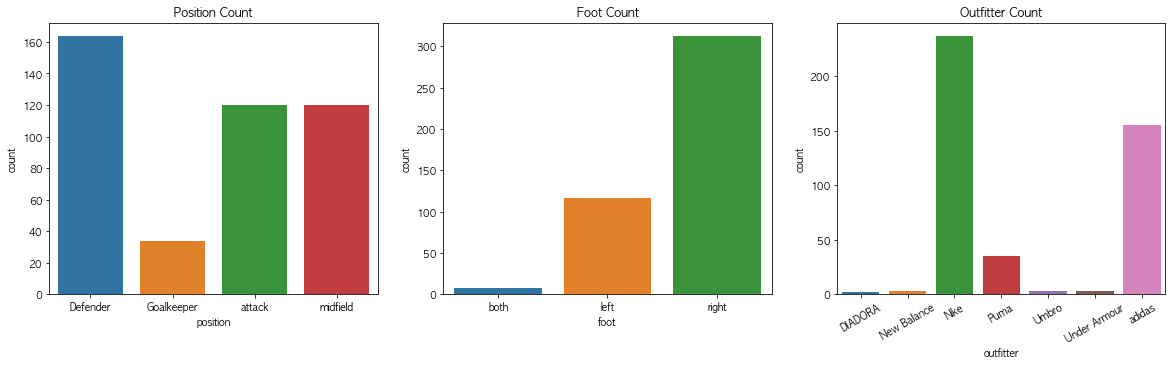

In [11]:
posi_df = premier_df.groupby('position').size().reset_index(name='count')
foot_df = premier_df.groupby('foot').size().reset_index(name='count')
outfit_df = premier_df.groupby('outfitter').size().reset_index(name='count')

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(data=posi_df, x='position', y='count', ax=ax[0])
sns.barplot(data=foot_df, x='foot', y='count', ax=ax[1])
sns.barplot(data=outfit_df, x='outfitter', y='count', ax=ax[2])

ax[0].set(title='Position Count')
ax[1].set(title='Foot Count')
ax[2].set(title='Outfitter Count')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30)

plt.show()

### Outfitter

- major : Nike, Puma, adidas
- others : Under Armour, New Balance, DIADORA, Umbro

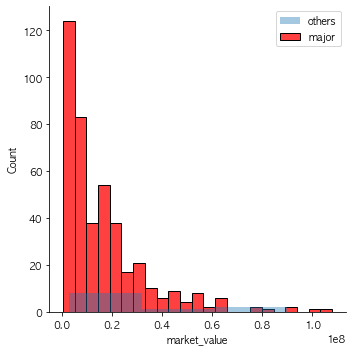

In [111]:
sns.displot(premier_df[premier_df['outfitter'].isin(premier_df['outfitter'].unique()[:3])]['market_value'], kde=False, color='r', label='major')
sns.distplot(premier_df[premier_df['outfitter'].isin(premier_df['outfitter'].unique()[3:])]['market_value'], kde=False, label='others')

plt.legend()
plt.show()

In [112]:
premier_df['outfitter'].unique()[3:]

array(['Under Armour', 'New Balance', 'DIADORA', 'Umbro'], dtype=object)

In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(np.array(premier_df['market_value']).reshape(-1, 1))

premier_df['mm_value'] = np.zeros((len(premier_df), 1))
for outfitter in premier_df['outfitter'].unique():
    premier_df['mm_value'][premier_df['outfitter'] == outfitter] = scaler.transform(np.array(premier_df[premier_df['outfitter'].isin([outfitter])]['market_value']).reshape(-1, 1)).flatten()

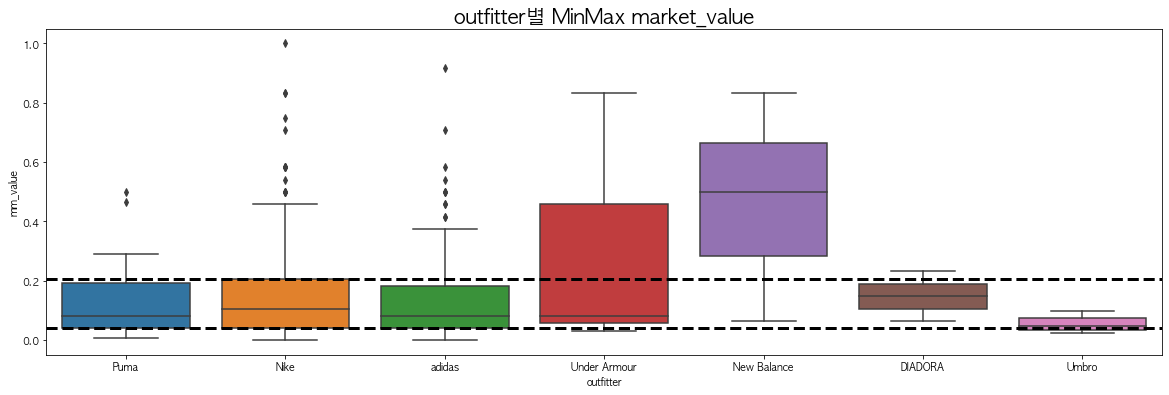

In [137]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=premier_df, x='outfitter', y='mm_value')
plt.axhline(np.percentile(premier_df['mm_value'], 25), color='black', linestyle='--', linewidth=3)
plt.axhline(np.percentile(premier_df['mm_value'], 75), color='black', linestyle='--', linewidth=3)
plt.title('outfitter별 MinMax market_value', fontsize=20)

plt.show()

---

---

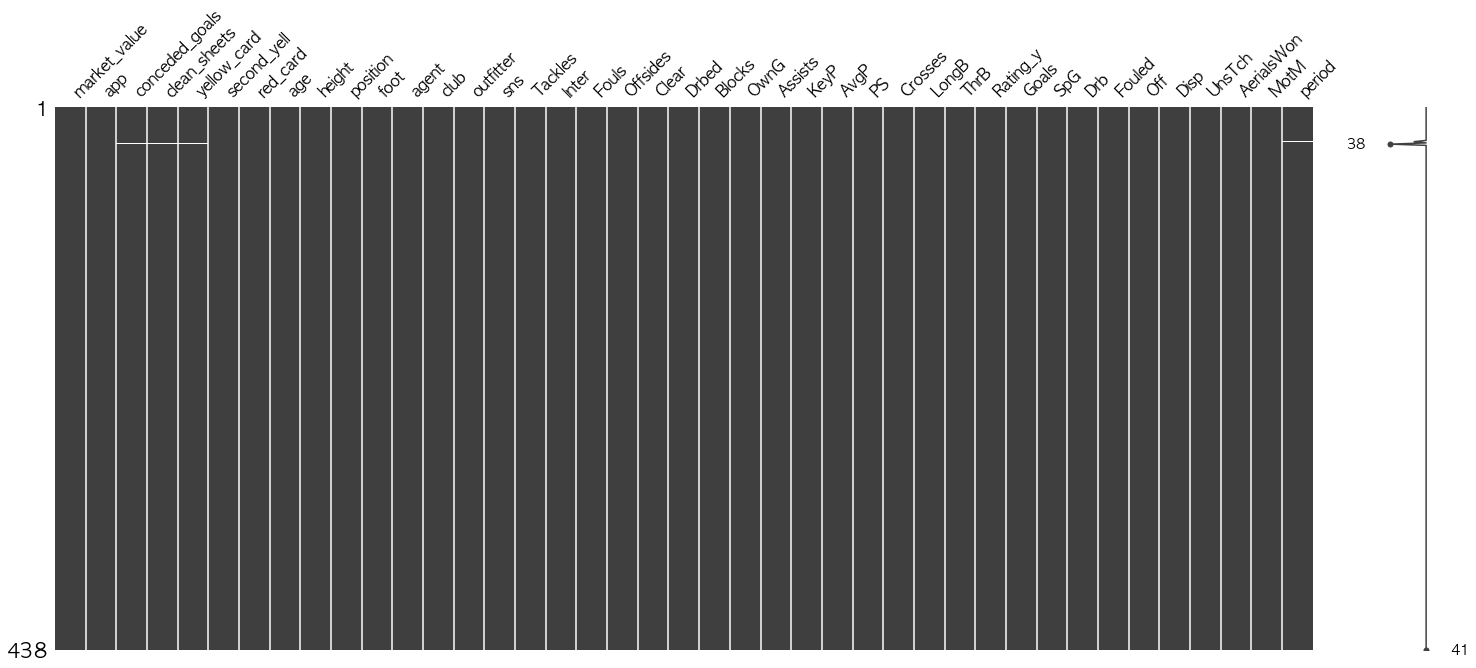

In [12]:
msno.matrix(premier_df);

In [13]:
premier_df[premier_df['conceded_goals'].isna()]

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,agent,club,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM,period
30,2700000,0,NaN,NaN,NaN,0,0,25,185,Defender,left,1,Liverpool FC,adidas,1,1.4,0.9,1.0,0.4,2.3,0.9,0.3,0.0,1.0,0.4,32.3,79.2,0.3,1.1,0.0,6.56,0.0,0.2,0.2,0.7,0.1,0.1,0.3,1.3,0.0,5.9


In [14]:
premier_df[premier_df['period'].isna()]

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,agent,club,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM,period
28,4500000,3,0.3,0.0,0.3,0,0,20,195,Defender,right,1,Liverpool FC U23,adidas,1,0.3,0.8,0.3,0.5,2.0,0.0,0.0,0.0,0.0,0.3,52.8,88.2,0.0,1.0,0.3,6.46,0.0,0.3,0.0,0.3,0.0,0.0,0.0,3.5,0.0,NaN


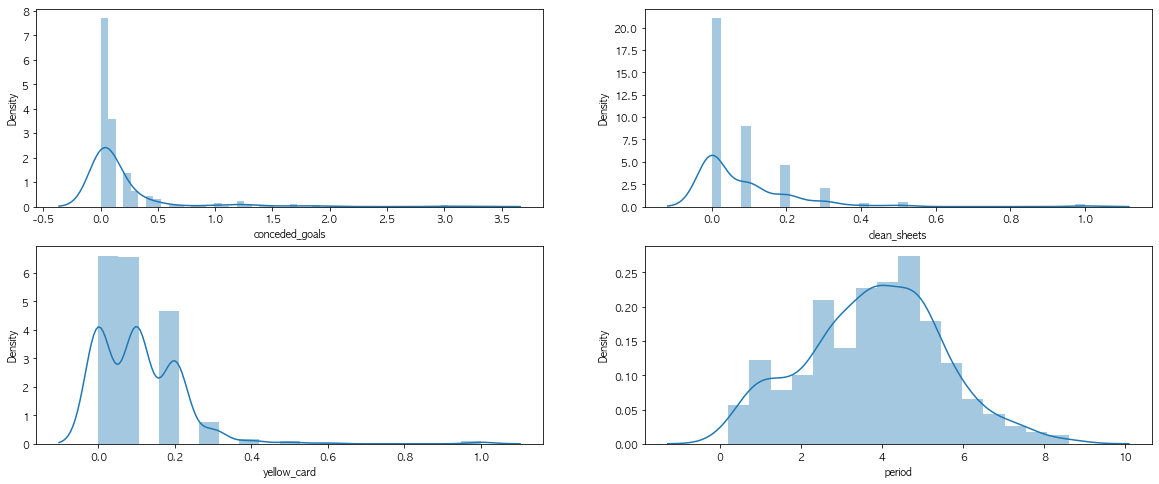

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 8))

sns.distplot(premier_df['conceded_goals'], ax=ax[0, 0])
sns.distplot(premier_df['clean_sheets'], ax=ax[0, 1])
sns.distplot(premier_df['yellow_card'], ax=ax[1, 0])
sns.distplot(premier_df['period'], ax=ax[1, 1])

plt.show()

- conceded_goals, clean_sheets, clean_sheets > 분포가 비대칭으로 중앙값으로 대체
- period > 정규분포와 비슷하므로 평균값으로 대체

In [16]:
premier_df['period'][premier_df['period'].isna()] = premier_df['period'].mean()
premier_df['conceded_goals'][premier_df['conceded_goals'].isna()] = premier_df['period'].median()
premier_df['clean_sheets'][premier_df['clean_sheets'].isna()] = premier_df['period'].median()
premier_df['yellow_card'][premier_df['yellow_card'].isna()] = premier_df['period'].median()

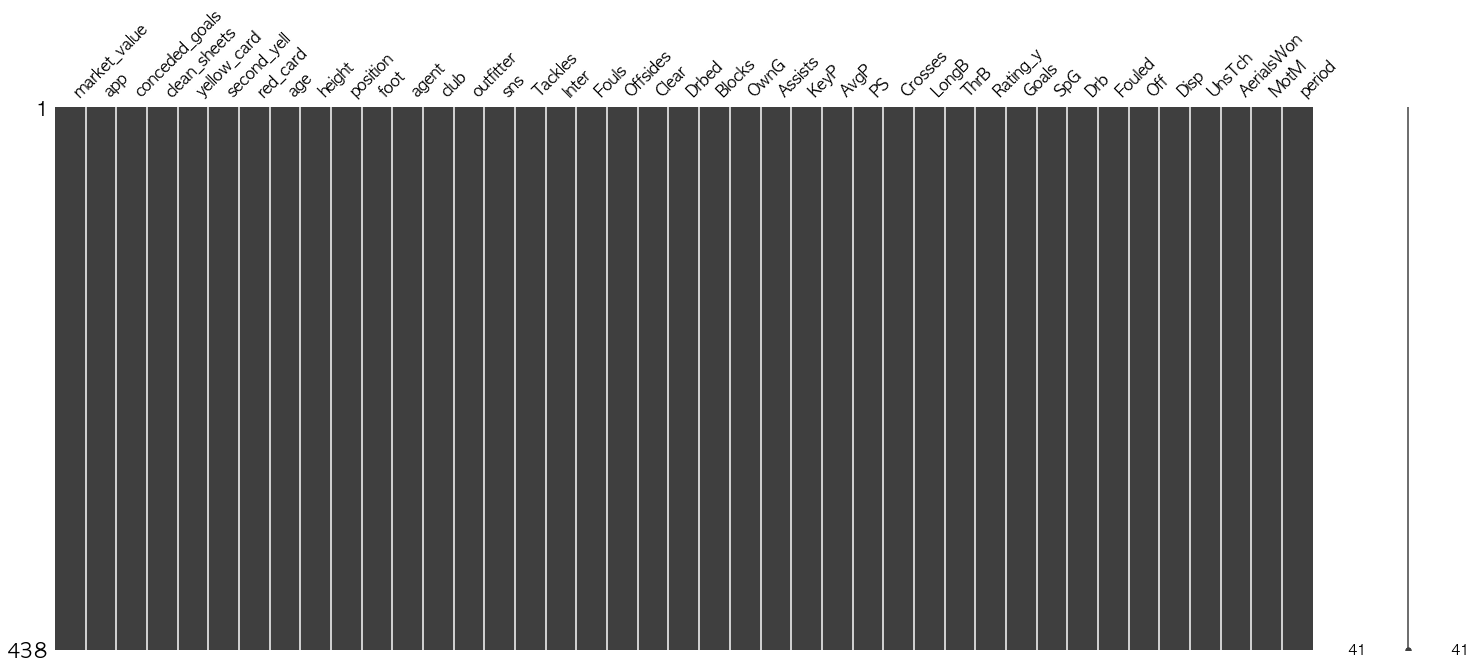

In [17]:
msno.matrix(premier_df);

In [18]:
premier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   market_value    438 non-null    int64  
 1   app             438 non-null    int64  
 2   conceded_goals  438 non-null    float64
 3   clean_sheets    438 non-null    float64
 4   yellow_card     438 non-null    float64
 5   second_yell     438 non-null    object 
 6   red_card        438 non-null    object 
 7   age             438 non-null    int64  
 8   height          438 non-null    int64  
 9   position        438 non-null    object 
 10  foot            438 non-null    object 
 11  agent           438 non-null    object 
 12  club            438 non-null    object 
 13  outfitter       438 non-null    object 
 14  sns             438 non-null    int64  
 15  Tackles         438 non-null    float64
 16  Inter           438 non-null    float64
 17  Fouls           438 non-null    flo

## Base Model

In [19]:
cate_var = []
cons_var = []
for col in premier_df.columns:
    if premier_df[col].dtype == "O":
        cate_var.append(col)
    else:
        cons_var.append(col)

In [20]:
print("범주형 :", cate_var)
print()
print("수치형 :", cons_var[:7])

범주형 : ['second_yell', 'red_card', 'position', 'foot', 'agent', 'club', 'outfitter']

수치형 : ['market_value', 'app', 'conceded_goals', 'clean_sheets', 'yellow_card', 'age', 'height']


In [3]:
# with open('datas/premierleague_players.pkl', 'rb') as f:
#     premier_df = pickle.load(f)

In [21]:
df = premier_df[cons_var]

df_x = df.drop(columns='market_value')
df_x1 = sm.add_constant(df_x)
df_y = df['market_value']

model_1 = sm.OLS(df_y, df_x1)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     23.43
Date:                Wed, 12 May 2021   Prob (F-statistic):           4.40e-74
Time:                        20:08:20   Log-Likelihood:                -7694.8
No. Observations:                 438   AIC:                         1.546e+04
Df Residuals:                     404   BIC:                         1.560e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.092e+07   3.13e+07     -0.

---

---

## Model2

In [22]:
print("범주형 :", cate_var)
print()
print("수치형 :", cons_var)

범주형 : ['second_yell', 'red_card', 'position', 'foot', 'agent', 'club', 'outfitter']

수치형 : ['market_value', 'app', 'conceded_goals', 'clean_sheets', 'yellow_card', 'age', 'height', 'sns', 'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drbed', 'Blocks', 'OwnG', 'Assists', 'KeyP', 'AvgP', 'PS', 'Crosses', 'LongB', 'ThrB', 'Rating_y', 'Goals', 'SpG', 'Drb', 'Fouled', 'Off', 'Disp', 'UnsTch', 'AerialsWon', 'MotM', 'period']


In [23]:
cate_var = ["C({})".format(col) for col in cate_var]
cate_var

['C(second_yell)',
 'C(red_card)',
 'C(position)',
 'C(foot)',
 'C(agent)',
 'C(club)',
 'C(outfitter)']

In [24]:
var_ls = cons_var + cate_var
var_ls.remove('market_value')

In [25]:
"market_value ~ 0 +" + "+".join(var_ls)

'market_value ~ 0 +app+conceded_goals+clean_sheets+yellow_card+age+height+sns+Tackles+Inter+Fouls+Offsides+Clear+Drbed+Blocks+OwnG+Assists+KeyP+AvgP+PS+Crosses+LongB+ThrB+Rating_y+Goals+SpG+Drb+Fouled+Off+Disp+UnsTch+AerialsWon+MotM+period+C(second_yell)+C(red_card)+C(position)+C(foot)+C(agent)+C(club)+C(outfitter)'

In [27]:
model_2 = sm.OLS.from_formula("market_value ~ 0 +" + "+".join(var_ls), data=premier_df)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     17.61
Date:                Wed, 12 May 2021   Prob (F-statistic):           6.25e-81
Time:                        20:09:32   Log-Likelihood:                -7615.4
No. Observations:                 438   AIC:                         1.537e+04
Df Residuals:                     370   BIC:                         1.564e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
C(se

-> 어떻게든 column의 수를 줄여야한다

In [28]:
with open('datas/modeling_dataset.pkl', 'wb') as f:
    pickle.dump(premier_df, f)